# Convolutional Neural Networks - CNN

This notebook is introduction into Convolutional Neural Networks, first part is trying to describe basic theory about CNN and second part is showing some simple models using TensorFlow & Keras.

_________________

## Theory

<div class="alert alert-block alert-warning"><b>Theory - basics</b></div>

*Simply put, CNN is just about multiplying and adding. Mathematical symbol for convolution is asterix, however, do not confuse that with an asterisk in programming. Convolution is performed by using a filters (or Kernels). Input - Convolution - Output.*

![Loss](dl10.png)

***So how is filter transforming our image to different one??***

![Loss](dl11.png)

*As we can see it is just multiplying in matrices, not by matrices! Calculation of final matrix is quite simple. It is input matrix - filter matrix and add +1 to row and column, so in this case we have:* **6x6 - 3x3 = 3+1x3+1, so final matrix is 4x4.**

![Loss](dl12.png)

***Convolution Equation***

<font size="6">
\begin{equation*}
\ (A*w)_{ij} =  \sum^{K-1}_{i'=0}\sum^{K-1}_{j'=0}A(i+i', j+j')w(i',j')
\end{equation*}
 </font>

*Where A is our base matrix, w is our filter matrix, i,i' and j, j' are basically coordinates but it can be a little confusing so simply put: this equation is just doing the calculation above and two sum symbols can be understood as another kind of iteration.*

<font size="4">
\begin{equation*}
\ (A*w)_{ij} =  \sum^{K-1}_{i'=0}\sum^{K-1}_{j'=0}A(i-i', j-j')w(i',j')
\end{equation*}
 </font>

*But maybe this equation is convolution and the first one is cross-corellation? :) In Machine Learning it probably doesn't matter, if we have an inverse result, so either first or second equation can be used.*

***So CNN could be also called Cross-corellation Neural Network, Convolution is just reversing the orientation of filter.***

**Mode valid and padding**

*In some cases we would want to have a final matrix with same dimension as our original matrix, we can add padding which means just adding zero values around our Matrix, but if we wanna have at least some values in these cells, we can add +1 padding. Bottom line we have these modes:*

- Valid | output size = N-K+1
- Same | output size = N
- Full | output size = N+K-1 

*But full mode is probably not so common.*

<div class="alert alert-block alert-danger"><b>BeAware:</b> CNN is pattern finder (car or dog etc.), if we rewrite equation into vecotrize form, we would get a dot product and therefore a relationship between Input-filter-output, or we could say - how well are corellated! Because positive correlation and high dot product and vice versa is the same.</div>

<div class="alert alert-block alert-warning"><b>CNN and color images</b></div>

*Color images are 3D objects - Weight x Width x Color, therefore our filter is not 2D but 3D.*

![Loss](dl13.png)

<font size="5">
\begin{equation*}
\ (A*w)_{ij} =  \sum^{3}_{c=1}\sum^{K}_{i'=1}\sum^{K}_{j'=1}A(i+i', j+j',c)w(i',j',c)
\end{equation*}
 </font>

*Where first sum is just for colors, otherwise it's the same system as before. But our equation is not counting with multiple features, and also the output has different number of dimensions than our input.*

![Loss](dl14.png)

*With more features we get 3D output. So our equation is a little different:*

<font size="5">
\begin{equation*}
\ B(i,j,c) = \sum^{K}_{i'=1}\sum^{K}_{j'=1}\sum^{C_1}_{c'=1}A(i+i', j+j',c')w(c',i',j',c)
\end{equation*}
 </font>

*Our final equation, we firstly iterate only through our array - i,j then we also iterate through colors c', and finally we are also iterating through filters c. A has only c' for colours and w has colos and also filters - c',c.*

**Convolution Layer**

<font size="5">
\begin{equation*}
\ Conv-layer: \sigma(W*x+b)
\end{equation*}
 </font>

<font size="5">
\begin{equation*}
\ Dense-layer: \sigma(W^T*x+b)
\end{equation*}
 </font>

*So why is CNN using Conv layer or not just a Dense layer? The main reason is computational complexity and avoiding of overfitting. It is all about filters, we don't need to look at every pixel in our image and compute everything, we just need to pick what we want to, so CNN is using shared weights, otherwise it would have a tremendous amount of parameters.* 

<div class="alert alert-block alert-danger"><b>BeAware:</b> In Dense layer bias term is a vector of same size as W-Transpose, but in Conv layer it is not, they are also shared - and the number of biases is number of filters(this part is a little unclear for me, better to look for another sources). </div>

<div class="alert alert-block alert-warning"><b>CNN Architecture</b></div>

*Let's start with a picture, it's more descriptive than words.*

![Loss](dl15.png)

**Pooling**

*It is just downsampling of our image. We have max and average method, which are hyperparameters. Calculation below does not need any explanation. Rather to ask which method should we use and why?*

![Loss](dl16.png)

***Why pooling?***

- less data to process
- translational invariance (important is to recognize presence of object in the image at any spot)

*CNN is hiearchically learning, and if we use multiple pool layers we will shrink our image (with still the same filter size) and therefore our filter increases the portion of image it can cover.*

**Hyperparameters**

*CNN offers a lot of hyperparameters. Here are some convention:*

- small filter relative to images
- always repeat convolution - pooling
- increase feature maps

<div class="alert alert-block alert-info"><b>Note:</b> Conv - Pol architecture can be replaced with strided convolutions -  no need for pooling</div>

**Stage 2 - Dense Layer**

*Our output is H x W x C, but Dense layer except 1D array. We have two solutions:*

- Flatten function
- Global Max Pooling (with this solution we can have CNN for different image sizes), always returns 1x1xC (feature maps)

<div class="alert alert-block alert-warning"><b>Data Augmentation</b></div>

![Loss](dl21.png)

*Well as I wrote before, it is always good to have a cat in your notebook. But again, the picture is explaining data augmentation perfectly! Deep Learning is getting better and better with more data, instead of classical machine learning algorithm where it hits plateau. Therefore we are shifting and moving our images to create "new ones".*

<div class="alert alert-block alert-danger"><b>BeAware: </b>in Python its done by using generator, so the memory is not over exceeded.</div>

*Long story short, keras has function ImageDataGenerator which recieves parameters how to shift or flip images, and data itself.*

<div class="alert alert-block alert-warning"><b>Batch Normalization</b></div>

*In classical Machine learning we just normalize our data an that is it. But in Deep Learning we have more layers, so we should normalize our data after each layer, this is especially true for CNN*

![Loss](dl22.png)

*So it really depends on data. We could probably plot data distribution after each layer and decide whether to use it or not. For example the plot above is showing a possible difference between using BN and not using. But as always it depends on many other factors.*

## Coding

<div class="alert alert-block alert-warning"><b>MNIST Fashion</b></div>

![Loss](dl19.png)

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
#new import for CNN
from tensorflow.keras.models import Model

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 1s 0us/step


In [11]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

*So our data are only in 2D because tha Fashion MNIST is only in black and white, so we need to add one more dimension.*

In [12]:
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)
#expand_dims = function for adding dimensions
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

*Now we have to find out how many items we have in our sets - unique label values.*

In [20]:
print(set(y_train)) #so we have 10 classes

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [21]:
K = len(set(y_train))

***Building a model.***

In [25]:
i = Input(shape=x_train[0].shape) #28x28x1 -> shape of one image
x = Conv2D(32, (3,3), strides = 2, activation="relu")(i)
# 32 = output feature maps, 3,3 is filter and strides is reducing imaage by half
#so with strides we don't need a pooling
x = Conv2D(64, (3,3), strides = 2, activation="relu")(x) #feature maps x2
x = Conv2D(128, (3,3), strides=2, activation="relu")(x) #feature maps x2
x = Flatten()(x)  #for dense layer we has to reduce number of dimensions
x = Dropout(0.2)(x) #converting into a feature vector
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x) #finally our multiclass classification function

model = Model(i,x)

*Compile*

In [27]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs= 10)
#hmm this pc has only integrated GPU..hope my CPU will make it :D - so I only use 10 repetition

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 328us/sample - loss: 0.5173 - accuracy: 0.8100 - val_loss: 0.4089 - val_accuracy: 0.8511
Epoch 2/10
60000/60000 [==============================] - 19s 316us/sample - loss: 0.3614 - accuracy: 0.8629 - val_loss: 0.3419 - val_accuracy: 0.8725
Epoch 3/10
60000/60000 [==============================] - 19s 318us/sample - loss: 0.3143 - accuracy: 0.8827 - val_loss: 0.3257 - val_accuracy: 0.8786
Epoch 4/10
60000/60000 [==============================] - 21s 342us/sample - loss: 0.2802 - accuracy: 0.8946 - val_loss: 0.3057 - val_accuracy: 0.8909
Epoch 5/10
60000/60000 [==============================] - 20s 334us/sample - loss: 0.2549 - accuracy: 0.9037 - val_loss: 0.3013 - val_accuracy: 0.8937
Epoch 6/10
60000/60000 [==============================] - 18s 307us/sample - loss: 0.2300 - accuracy: 0.9126 - val_loss: 0.2956 - val_accuracy: 0.8905
Epoch 7/10
60000/60000 [====================

*Basic plots*

(<matplotlib.legend.Legend at 0x2a2b72508c8>,
 <matplotlib.legend.Legend at 0x2a2b7245ec8>)

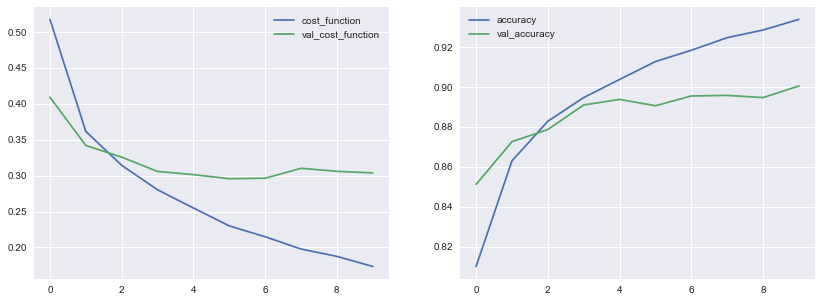

In [28]:
plt.style.use('seaborn')
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,5))
axs[0].plot(r.history['loss'], label='cost_function')
axs[0].plot(r.history['val_loss'], label='val_cost_function')
axs[1].plot(r.history['accuracy'], label='accuracy')
axs[1].plot(r.history['val_accuracy'], label='val_accuracy')
axs[0].legend(), axs[1].legend()

*Now confusin matrix, only copy and paste..*

Confusion matrix, without normalization
[[875   0  28  14   2   2  73   0   6   0]
 [  4 965   2  20   4   0   3   0   2   0]
 [ 16   0 871   8  58   0  47   0   0   0]
 [ 23   3  18 907  30   0  19   0   0   0]
 [  1   0  50  24 854   0  68   0   3   0]
 [  0   0   0   1   0 964   0  15   3  17]
 [131   0  85  28  87   0 658   0  11   0]
 [  0   0   0   0   0   7   0 963   0  30]
 [  4   0   5   3   1   3   5   4 975   0]
 [  1   0   0   0   0   3   0  24   0 972]]


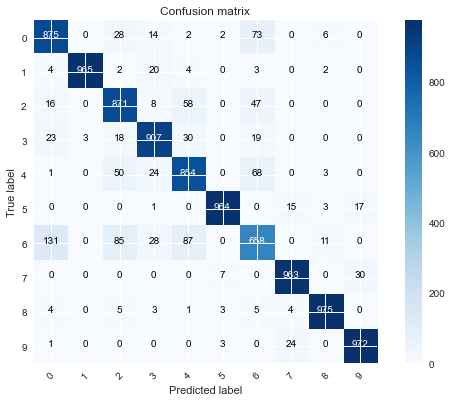

In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [34]:
labels = ["T-shirt/top","Trouser","Pullover","Dress",
          "Coat","Sandal","Shirt","Sneaker","Bag","Ankgle boot"]

In [35]:
def show_false_class():
    false_classification = np.where(p_test != y_test)[0]
    i = np.random.choice(false_classification)
    plt.title(f"True label:{labels[y_test[i]]} and Predicted: {labels[p_test[i]]}")
    return plt.imshow(x_test[i].reshape(28,28), cmap='gray')
#a little change to our function for missclassification - our third dimension is useless here

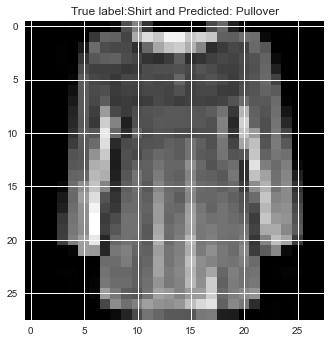

In [37]:
show_false_class()

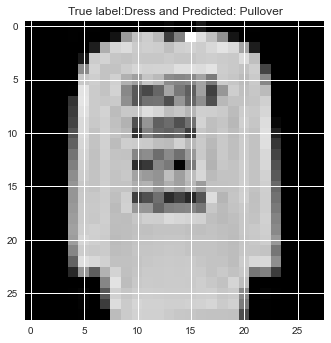

In [39]:
show_false_class()

*The results are much worse because tha pictures are just more complicated. For example: the highest number of mistakes was between Shirt and T-shirt, which is not suprising at all.*

<div class="alert alert-block alert-warning"><b>CIFAR</b></div>

*Very briefly the same process but with CIFAR, colored images and therefore with more dimensions.*

![Loss](DL20.png)

In [40]:
cifar10 = tf.keras.datasets.cifar10 #our data
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #loading data
x_train, x_test = x_train / 255.0, x_test / 255.0 #scaling pixel values
y_train, y_test = y_train.flatten(), y_test.flatten() 
x_train.shape,y_train.shape

170500096/170498071 [==============================] - 70s 0us/step
(50000, 32, 32, 3)


((50000, 32, 32, 3), (50000,))

In [42]:
K = len(set(y_train)) #getting number of labels
K

10

***Building a model***

In [43]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

#almost identical as model for MNIST Fashion

*Compile*

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
#only 10 ...

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 48s 964us/sample - loss: 1.5857 - accuracy: 0.4182 - val_loss: 1.3222 - val_accuracy: 0.5185
Epoch 2/10
50000/50000 [==============================] - 38s 758us/sample - loss: 1.2916 - accuracy: 0.5348 - val_loss: 1.2409 - val_accuracy: 0.5536
Epoch 3/10
50000/50000 [==============================] - 37s 744us/sample - loss: 1.1664 - accuracy: 0.5844 - val_loss: 1.0653 - val_accuracy: 0.6193
Epoch 4/10
50000/50000 [==============================] - 36s 726us/sample - loss: 1.0726 - accuracy: 0.6167 - val_loss: 1.0178 - val_accuracy: 0.6363
Epoch 5/10
50000/50000 [==============================] - 38s 754us/sample - loss: 0.9993 - accuracy: 0.6453 - val_loss: 0.9687 - val_accuracy: 0.6552
Epoch 6/10
50000/50000 [==============================] - 38s 768us/sample - loss: 0.9458 - accuracy: 0.6611 - val_loss: 0.9303 - val_accuracy: 0.6757
Epoch 7/10
50000/50000 [====================

*Basic plots as usual.*

(<matplotlib.legend.Legend at 0x2a2b8835d48>,
 <matplotlib.legend.Legend at 0x2a2b88ad748>)

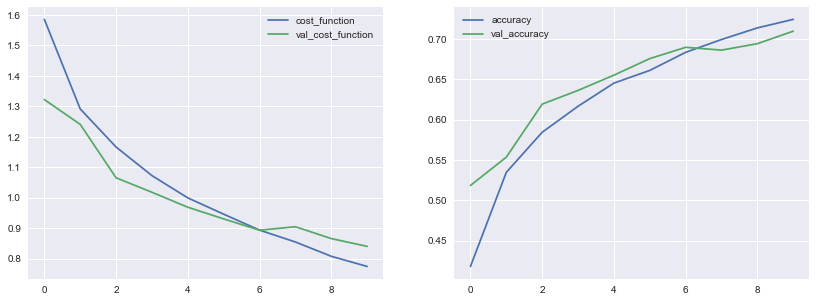

In [45]:
plt.style.use('seaborn')
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,5))
axs[0].plot(result.history['loss'], label='cost_function')
axs[0].plot(result.history['val_loss'], label='val_cost_function')
axs[1].plot(result.history['accuracy'], label='accuracy')
axs[1].plot(result.history['val_accuracy'], label='val_accuracy')
axs[0].legend(), axs[1].legend()

*Now the confusion matrix.*

Confusion matrix, without normalization
[[770  20  20  14  20  11   9  20  86  30]
 [ 23 842   2   9   3   4   8   3  31  75]
 [ 79   6 482  61 151  89  67  31  23  11]
 [ 23   9  46 508  97 176  70  40  12  19]
 [ 28   1  39  58 737  31  34  55  11   6]
 [ 11   3  29 163  86 615  28  48   8   9]
 [  8   4  20  57  76  34 774  13  11   3]
 [ 12   1  23  42  84  53   6 761   3  15]
 [ 63  36   7  15   8   3   6   4 846  12]
 [ 40 101   7  18   6   7   7  14  38 762]]


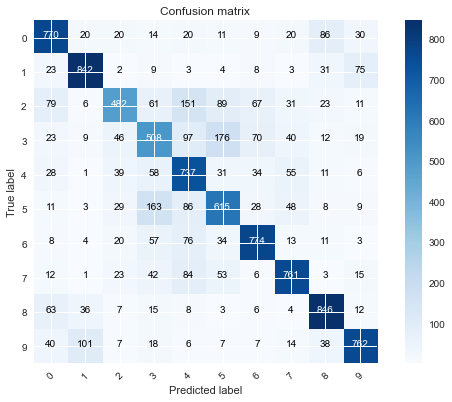

In [46]:
p_test2 = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test2)
plot_confusion_matrix(cm, list(range(10)))

In [47]:
labels_cifar = ["airplane","automobile","bird","cat","deer","dog",
                "frog","horse","ship","truck"]

Text(0.5, 1.0, 'True bird, Predicted: horse')

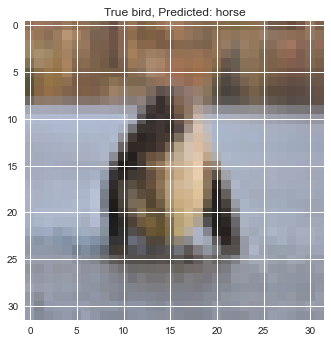

In [49]:
false_class = np.where(p_test2 != y_test)[0]
i = np.random.choice(false_class)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True {labels_cifar[y_test[i]]}, Predicted: {labels_cifar[p_test[i]]}")

*Our model is doing pretty bad job :). But it's working and even trying to predict something so that is really great! Cat vs Dog is really tough one for this model. Let's proceed with better model for CIFAR10.*

<div class="alert alert-block alert-warning"><b>CIFAR10 V2.0</b></div>

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, \
Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
#some more imports
from tensorflow.keras.models import Model

In [52]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
#the same

In [53]:
K = len(set(y_train))
K

10

***Building a model with Augmentation and BN***

In [54]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

S*o what are we doing differently?*

- we are not using strides and therefore we are using MaxPooling
- we are using MaxPooling after multiple Conv2D (with same feature maps)
- we are using padding with value: same
- not using dropout between Conv2D

*Compile*

In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#still the same

***Testing with augmentation***

In [58]:
batch_size = 32  
#I am creating our Generator
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                                height_shift_range=0.1,
                                                                horizontal_flip = True)
#generator is shifting and flipping data

In [73]:
type(data_generator) 

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [59]:
train_generator = data_generator.flow(x_train, y_train, batch_size)

In [76]:
type(train_generator) #we can see that we have just created an generator 
# ..which will yield our data - and will be exhausted!

keras_preprocessing.image.numpy_array_iterator.NumpyArrayIterator

In [81]:
steps_per_epoch = x_train.shape[0] // batch_size
steps_per_epoch 

1562

In [82]:
result = model.fit(train_generator, validation_data=(x_test, y_test), \
                   steps_per_epoch=steps_per_epoch, epochs=50)

#so this part is not so clear for me, but I guess that we are training 
# 50 epochs and each epochs contains 1562 records - which are generated 
# or maby more...but on this pc it will take a really lot of time..

  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/50
1562/1562 [==============================] - 374s 239ms/step - loss: 1.4438 - accuracy: 0.4981 - val_loss: 1.3047 - val_accuracy: 0.5654
Epoch 2/50
1562/1562 [==============================] - 370s 237ms/step - loss: 0.9908 - accuracy: 0.6555 - val_loss: 0.8974 - val_accuracy: 0.6851
Epoch 3/50
1562/1562 [==============================] - 388s 248ms/step - loss: 0.8477 - accuracy: 0.7105 - val_loss: 0.7500 - val_accuracy: 0.7377
Epoch 4/50
1562/1562 [==============================] - 365s 233ms/step - loss: 0.7585 - accuracy: 0.7400 - val_loss: 0.7406 - val_accuracy: 0.7486
Epoch 5/50
1562/1562 [==============================] - 379s 243ms/step - loss: 0.6859 - accuracy: 0.7656 - val_loss: 0.6432 - val_accuracy: 0.7886
Epoch 6/50
1562/1562 [==============================] - 366s 235ms/step - loss: 0.6279 - accuracy: 0.7869 - val_loss: 0.7812 - val_accuracy: 0.7423
Epoch 7/50
1562/1562 [=================

*We are having model which is much more precise, but testing will last for 5 hours on PC with no GPU :(, its more than a coffee break..I really have to make a home-made parallel computing..*

![Loss](dl23.jpg)

*After long Time...We can finally look at some plots*

(<matplotlib.legend.Legend at 0x2a2d5299388>,
 <matplotlib.legend.Legend at 0x2a2d5313a08>)

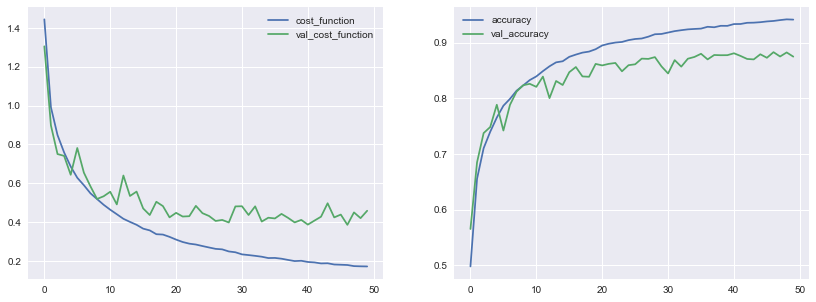

In [83]:
plt.style.use('seaborn')
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,5))
axs[0].plot(result.history['loss'], label='cost_function')
axs[0].plot(result.history['val_loss'], label='val_cost_function')
axs[1].plot(result.history['accuracy'], label='accuracy')
axs[1].plot(result.history['val_accuracy'], label='val_accuracy')
axs[0].legend(), axs[1].legend()

Confusion matrix, without normalization
[[870   7  14   9   9   0  10   3  49  29]
 [  4 949   0   0   0   0   1   0   6  40]
 [ 37   4 783  33  37  24  58   7   6  11]
 [ 10   2  26 726  34 101  62   9  16  14]
 [  5   2  21  22 870  12  45  14   4   5]
 [  5   0  10  80  29 825  27  15   4   5]
 [  4   2   6  14   4   3 959   2   4   2]
 [  8   1  10  16  33  24  10 883   3  12]
 [ 20  10   3   5   1   1   2   0 936  22]
 [  6  27   1   2   1   0   5   0   8 950]]


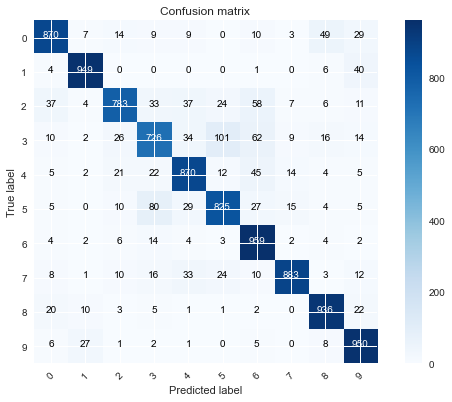

In [84]:
p_test3 = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test3)
plot_confusion_matrix(cm, list(range(10)))

In [85]:
labels_cifar = ["airplane","automobile","bird","cat","deer","dog",
                "frog","horse","ship","truck"]

Text(0.5, 1.0, 'True dog, Predicted: ship')

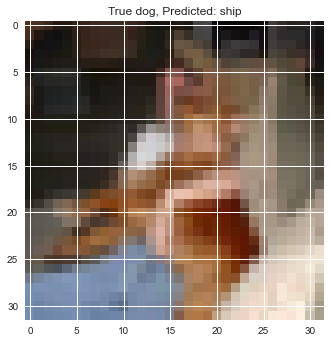

In [86]:
false_class = np.where(p_test3 != y_test)[0]
i = np.random.choice(false_class)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True {labels_cifar[y_test[i]]}, Predicted: {labels_cifar[p_test[i]]}")

*Overall we are doing quite a good job, for a simple model with just few adjustments.*

_______________

***The End***